In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import GradientBoostingRegressor

import klib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML 1st month\datasets\global_shark_attacks.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   name       6670 non-null   object 
 8   sex        6318 non-null   object 
 9   age        3903 non-null   object 
 10  fatal_y_n  6890 non-null   object 
 11  time       3372 non-null   object 
 12  species    3772 non-null   object 
dtypes: float64(1), object(12)
memory usage: 699.9+ KB


In [16]:
df.head()

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
0,2023-05-13,2023.0,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,10h10,White shark
1,2023-04-29,2023.0,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,NaN,N,11h20,1m shark
2,2022-10-07,2022.0,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,11h30,Bull shark
3,2021-10-04,2021.0,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,NaN,NaN
4,2021-10-03,2021.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,NaN,N,12h00,NaN


GridSpec(6, 6)

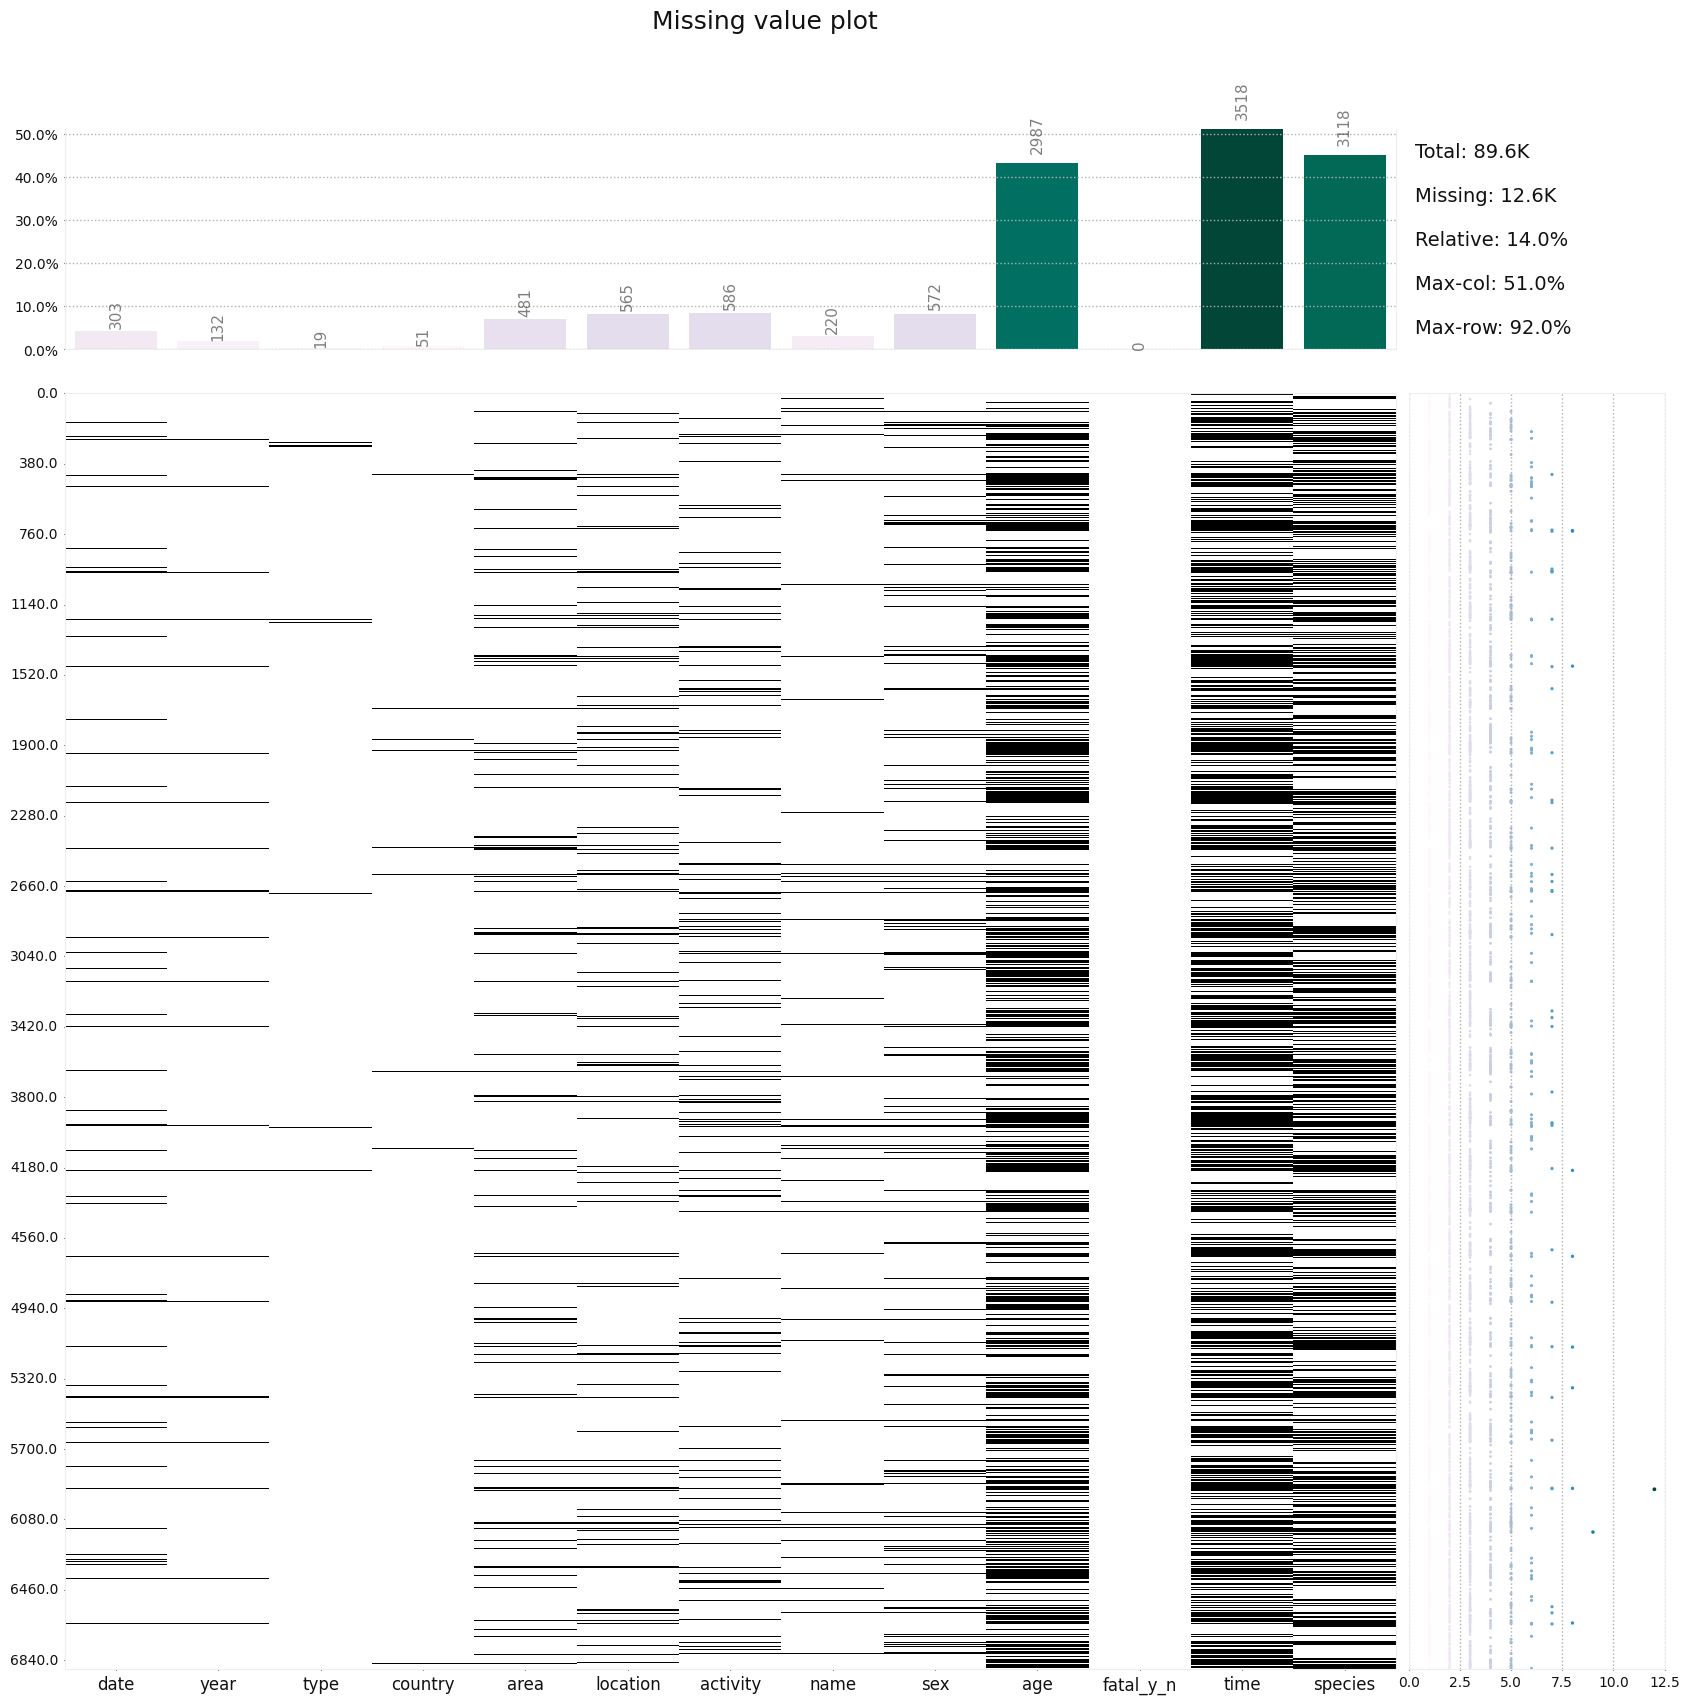

In [17]:
klib.missingval_plot(df)

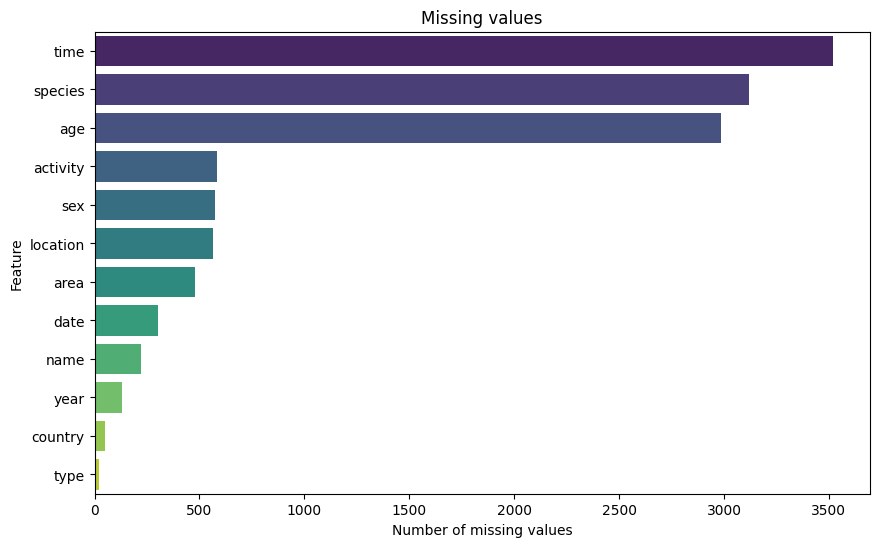

In [21]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, palette='viridis')
plt.title('Missing values')
plt.xlabel('Number of missing values')
plt.ylabel('Feature')
plt.show()

In [35]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns

num_features = Pipeline(steps=[
  ('impute', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

cat_features = Pipeline(steps=[
  ('impute', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
  ('num', num_features, num_col),
  ('cat', cat_features, cat_col)
])

pipeline = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('model', DecisionTreeClassifier())
])

In [36]:
params = {
  'model__max_depth': [3,5,7,None],
  'model__min_samples_split': [2,5,10],
  'model__min_samples_leaf': [1,3,5],
  'model__max_features': ['auto', 'log2', 'sqrt', None]
}


In [37]:
random_search = RandomizedSearchCV(
  estimator = pipeline,
  param_distributions = params,
  n_iter = 10,
  cv=5,
  n_jobs = -1,
  random_state = 42
)

In [38]:
grid_search = GridSearchCV(
  estimator=pipeline,
  scoring='r2',
  n_jobs=-1,
  param_grid=params,
  cv=5
)


In [39]:
x = df.drop('type', axis=1)
y = df['type']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)


In [ ]:
random_search.fit(x_train, y_train)